<a href="https://colab.research.google.com/github/gustavogrds/TIC_01_2023/blob/main/ACD_T17_Redes_Neurais_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Redes Neurais</font></h1>
<hr>

## **Case**: Steel Plates Fault

http://archive.ics.uci.edu/ml/datasets/steel+plates+faults

Dataset:

https://meusite.mackenzie.br/rogerio/STEEL_faults.csv

Um conjunto de dados de falhas em placas de aço, classificadas em 7 tipos diferentes. O objetivo é treinar um modelo deep learning para o reconhecimento automático de padrões.


Data Set Information:

Type of dependent variables (7 Types of Steel Plates Faults):

1.Pastry

2.Z_Scratch

3.K_Scatch

4.Stains

5.Dirtiness

6.Bumps

7.Other_Faults



# imports


In [ ]:
# imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

# Exercício. Acesse e Explore os Dados

Que transformações são necessárias para o treinamento dos dados?

In [ ]:
df = pd.read_csv("https://meusite.mackenzie.br/rogerio/STEEL_faults.csv")
                     
print(df.head())
print(df.shape) 
print(df.iloc[0])
print(df.isnull().sum())



   X_Minimum  X_Maximum  Y_Minimum  ...  Dirtiness  Bumps  Other_Faults
0         42         50     270900  ...          0      0             0
1        645        651    2538079  ...          0      0             0
2        829        835    1553913  ...          0      0             0
3        853        860     369370  ...          0      0             0
4       1289       1306     498078  ...          0      0             0

[5 rows x 34 columns]
(1941, 34)
X_Minimum                    42.0000
X_Maximum                    50.0000
Y_Minimum                270900.0000
Y_Maximum                270944.0000
Pixels_Areas                267.0000
X_Perimeter                  17.0000
Y_Perimeter                  44.0000
Sum_of_Luminosity         24220.0000
Minimum_of_Luminosity        76.0000
Maximum_of_Luminosity       108.0000
Length_of_Conveyer         1687.0000
TypeOfSteel_A300              1.0000
TypeOfSteel_A400              0.0000
Steel_Plate_Thickness        80.0000
Edges_Index     

# Exercício. Prepare os Dados de Entrada `X`

Não é necessário tratamento de dados nulos. A normalização das entradas, entretanto, é necessária. Depois de fazer o a seleção dos atributos de `X` ( `X = df[['col1', 'col2', ... ]]` ), faça o `scale` dos dados. Empregue o `df.columns()` para ajudar a obter o nome das colunas. 

In [ ]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [ ]:
X = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
    
from sklearn.preprocessing import scale, normalize

X = scale(X)


In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,-1.016481,-1.141639,-0.777729,-0.777729,-0.314852,-0.314996,-0.091389,-0.355537,-0.266099,-1.187708,1.576303,1.223956,-1.223956,0.022920,-0.940864,-1.258531,-1.435364,-0.486227,-0.575331,0.796401,0.879804,-0.083538,-0.898437,0.528872,1.467656,-1.075752,-0.009490
1,0.141894,0.066403,0.500188,0.500171,-0.345623,-0.338242,-0.124225,-0.380574,-0.017079,-0.384975,1.576303,1.223956,-1.223956,0.022920,1.445043,-0.254349,-1.342740,-0.504888,-0.043290,0.654223,0.879804,-0.581936,-1.157841,0.130174,1.417530,-0.297824,-0.845759
2,0.495362,0.436253,-0.054546,-0.054566,-0.352784,-0.344883,-0.150024,-0.387261,0.449832,-0.277944,1.133521,1.223956,-1.223956,0.386082,2.133548,-0.521791,-0.876299,-0.503191,0.573451,0.571820,0.879804,-0.812814,-1.157841,-0.325764,1.165103,0.057185,-1.091513
3,0.541467,0.486504,-0.722225,-0.722225,-0.332463,-0.328279,-0.089044,-0.365736,0.449832,-0.224429,-0.734467,-0.817023,0.817023,3.836121,1.324897,0.197460,-1.532047,-0.477744,-0.296153,0.796401,0.879804,-0.313021,-1.018897,0.550227,1.519978,-0.171419,-0.189237
4,1.379032,1.382988,-0.649678,-0.649559,0.099692,-0.172201,0.415209,0.079307,-1.480069,-0.224429,-0.734467,-0.817023,0.817023,1.929520,-0.875117,0.250657,-1.861950,-0.352206,-1.345434,0.747301,0.879804,1.127655,-0.218461,2.216130,1.698514,-0.456503,1.221636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-0.618830,-0.685357,-0.746795,-0.746811,-0.313690,-0.192126,-0.142987,-0.334424,1.072381,0.578304,-0.686037,-0.817023,0.817023,-0.703404,0.115090,-0.172003,0.002335,-0.216488,-0.378385,-0.367922,-1.193905,-0.071239,0.231603,-0.438483,-1.022264,0.900332,0.412476
1937,-0.820537,-0.890382,-0.738452,-0.738468,-0.310981,-0.225334,-0.138297,-0.335271,0.854489,0.150180,-0.686037,-0.817023,0.817023,-0.703404,-0.400205,0.300210,-0.082539,-0.179166,0.386784,-0.449045,-1.193905,-0.043727,0.323402,-0.380362,-1.068196,0.491534,0.683276
1938,-0.818616,-0.892392,-0.712412,-0.712430,-0.310013,-0.238617,-0.142987,-0.329467,1.103509,0.524788,-0.686037,-0.817023,0.817023,-0.703404,-0.395533,-0.623084,-0.197673,-0.204613,0.470661,-0.562189,-1.193905,-0.034218,0.263172,-0.500126,-1.130504,0.917814,0.360909
1939,-0.833984,-0.900432,-0.692280,-0.692288,-0.285435,-0.049331,-0.084353,-0.299900,1.010126,0.524788,-0.686037,-0.817023,0.817023,-0.703404,-0.434580,1.283988,1.360326,-0.153719,-1.111484,-0.656975,-1.193905,0.164584,0.379686,0.194019,-0.287351,0.767876,1.197767


# Exercício. Prepare a saída `y`

Lembre-se no `Keras`/`TensorFlow` há uma saída binária para cada classe.

In [ ]:
y = df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']]

# Exercício. Separe os dados de Treinamento e Teste

Empregue o scikit-learn para separar os dados de treinamento e teste. Empregue 0.3 de dados de teste e o `seed=1984` para geração dos dados. 

In [ ]:
from sklearn.model_selection import train_test_split

seed = 1984 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)


# Exercício. Faça o Treinamento do Modelo Deep Learning

Empregue o modelo de código da aula de Teoria para completar o código abaixo e treine o Modelo Neural. Você vai configurar uma única camada oculta de 16 neurônios e função de ativação sigmoid.

In [ ]:
from numpy.random import seed  # para garantir a reprodutibilidade dos resultados
seed(1984)
tf.random.set_seed(1984)

# camada de entrada 
model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])]) 

# entre aqui com uma camada oculta de 16 neurônios e função de ativação sigmoid
model.add(layers.Dense(16, activation='sigmoid'))

# entre aqui com a camada de saída
model.add(layers.Dense(7, activation='sigmoid'))

# entre aqui com a compilação do modelo com as métricas e métodos empregadas em teoria 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# entre aqui com o treinamento do modelo com 0.2 dos dados para validação e 100 iterações de treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 6ms/step - loss: 1.8632 - accuracy: 0.2081 - val_loss: 1.7805 - val_accuracy: 0.3934
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7708 - accuracy: 0.3886 - val_loss: 1.6969 - val_accuracy: 0.3603
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6996 - accuracy: 0.3435 - val_loss: 1.6352 - val_accuracy: 0.3603
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6487 - accuracy: 0.3435 - val_loss: 1.5924 - val_accuracy: 0.3603
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6102 - accuracy: 0.3435 - val_loss: 1.5586 - val_accuracy: 0.3603
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5785 - accuracy: 0.3435 - val_loss: 1.5264 - val_accuracy: 0.3603
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5473 - accuracy: 0.3435 - val_loss: 1.4946 - val_accuracy: 0.3603
Epoch 8/100
3

# Exercício. Visualize o modelo

Empregue o comando `model.summary()` para exibir o modelo. O código a seguir exibe graficamente a rede criada.

\* nota: o símbolo ? aparece na figura é empregado para outros modelos de rede.  

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 27)                756       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 119       
Total params: 1,323
Trainable params: 1,323
Non-trainable params: 0
_________________________________________________________________
None


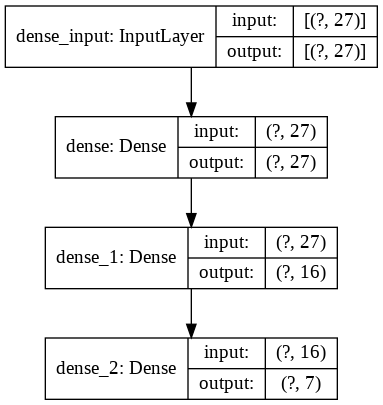

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Exercício. Analise o Treinamento da Rede

Empregue a função `plot_loss_acc` abaixo (veja a sintaxe da chamada na teoria) para analisar o treinamento da rede. 

In [ ]:
def plot_loss_acc(history,more_title=''):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc


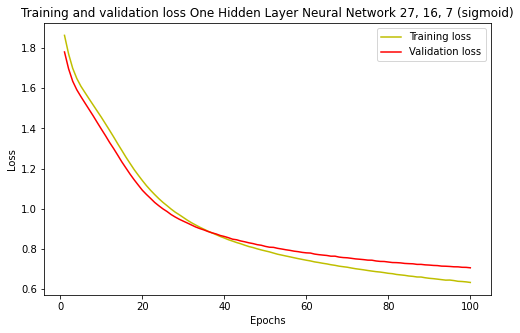

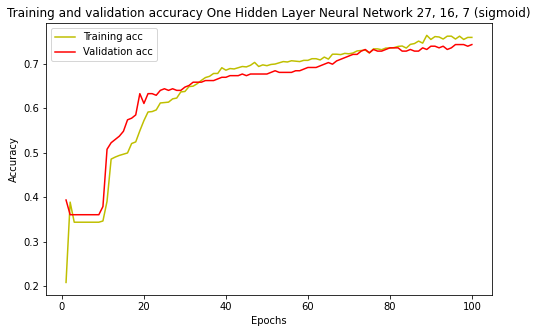

One Hidden Layer Neural Network 27, 16, 7 (sigmoid)Accuracy Train: 75.87 %, Accuracy Test: 74.26 %


In [ ]:
loss, val_loss, acc, val_acc = plot_loss_acc(history,'One Hidden Layer Neural Network 27, 16, 7 (sigmoid)')


# Exercício. Reduzindo o *Overfitting* (**RESOLVIDO**)

O *overfitting* ou sobreajuste é uma acuracidade excessiva do modelo no conjunto de treinamento. Isso pode levar a modelos pouco generalizados e, depois de outras métricas de acuracidade, é uma métrica que deve ser analisada para a qualidade do modelo.

Aqui empregaremos uma técnica chamada `drop out`. 

Epoch 1/100
34/34 [==============================] - 0s 6ms/step - loss: 1.8644 - accuracy: 0.2173 - val_loss: 1.7822 - val_accuracy: 0.3824
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7749 - accuracy: 0.3821 - val_loss: 1.6999 - val_accuracy: 0.3603
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7051 - accuracy: 0.3453 - val_loss: 1.6395 - val_accuracy: 0.3603
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6559 - accuracy: 0.3435 - val_loss: 1.5977 - val_accuracy: 0.3603
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6192 - accuracy: 0.3435 - val_loss: 1.5654 - val_accuracy: 0.3603
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5900 - accuracy: 0.3435 - val_loss: 1.5350 - val_accuracy: 0.3603
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5607 - accuracy: 0.3435 - val_loss: 1.5049 - val_accuracy: 0.3603
Epoch 8/100
3

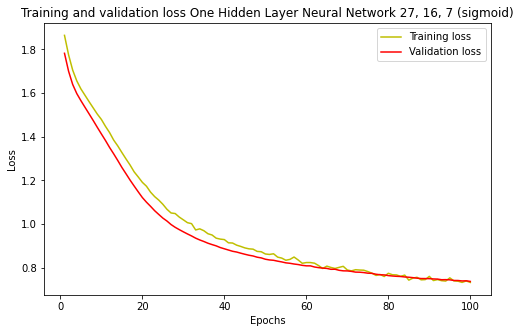

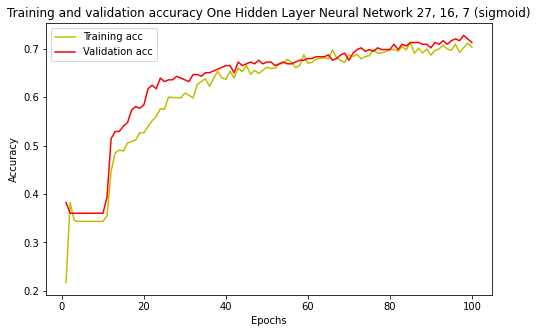

One Hidden Layer Neural Network 27, 16, 7 (sigmoid)Accuracy Train: 70.35 %, Accuracy Test: 71.32 %


In [ ]:
all_results = [] 
from keras.layers import Dropout

from numpy.random import seed
seed(1984)
tf.random.set_seed(1984)


model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])]) 
model.add(Dropout(0.20))

model.add(layers.Dense(16, activation='sigmoid'))

model.add(layers.Dense(7, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

loss, val_loss, acc, val_acc = plot_loss_acc(history,'One Hidden Layer Neural Network 27, 16, 7 (sigmoid)')


# Exercício. Fazendo a Predição dos dados de Teste

Faça a predição dos casos de teste e analise os resultados empregando o `classification_report` do `scikit-learn`.

Lembre-se, cada neurônio de saída da rede retorna a probabilidade de uma das 7 classes. A seleção do neurônio com maior probabilidade retorna a classe mais provável (empregue o comando `np.argmax()`).

Veja a saída:

In [ ]:
model.predict(X_test)

array([[2.6858747e-03, 2.7559072e-01, 8.0600381e-04, ..., 3.4257770e-04,
        1.4950573e-02, 2.5667310e-02],
       [1.3717920e-02, 1.5979111e-03, 1.3285875e-04, ..., 7.6599717e-03,
        2.1780896e-01, 1.0534546e-01],
       [3.7643313e-04, 6.6775084e-04, 5.1715255e-01, ..., 7.8175453e-06,
        1.2518764e-03, 6.1406493e-03],
       ...,
       [5.4869056e-04, 4.7832727e-04, 5.1059675e-01, ..., 1.0615984e-05,
        1.1377037e-03, 7.8166127e-03],
       [4.8181415e-04, 5.4866076e-04, 5.0464618e-01, ..., 9.4593115e-06,
        1.1180043e-03, 7.1198046e-03],
       [5.5281222e-03, 1.5033484e-03, 2.2917986e-04, ..., 1.3267100e-03,
        1.5069860e-01, 7.8694612e-02]], dtype=float32)

In [ ]:
y_pred_ = np.argmax(model.predict(X_test), axis=-1)

y_pred = y_test*0
for i in range(len(y_pred)):
  y_pred.iloc[i,y_pred_[i]] = 1
    
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.32      0.38        47
           1       0.80      0.86      0.83        57
           2       0.92      0.96      0.94       117
           3       0.77      0.91      0.83        22
           4       0.00      0.00      0.00        17
           5       0.62      0.55      0.58       121
           6       0.63      0.73      0.68       202

   micro avg       0.70      0.70      0.70       583
   macro avg       0.60      0.62      0.61       583
weighted avg       0.68      0.70      0.69       583
 samples avg       0.70      0.70      0.70       583



# Exercício. Faça o Treinamento de outros Modelos

Faça o treinamento de outras configurações até obter uma acuracidade do conjunto de validação superior a 0.4165 (primeiro modelo) e discuta seus resultados.  

Epoch 1/100
34/34 [==============================] - 0s 5ms/step - loss: 1.8632 - accuracy: 0.2081 - val_loss: 1.7805 - val_accuracy: 0.3934
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7708 - accuracy: 0.3886 - val_loss: 1.6969 - val_accuracy: 0.3603
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6996 - accuracy: 0.3435 - val_loss: 1.6352 - val_accuracy: 0.3603
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6487 - accuracy: 0.3435 - val_loss: 1.5924 - val_accuracy: 0.3603
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6102 - accuracy: 0.3435 - val_loss: 1.5586 - val_accuracy: 0.3603
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5785 - accuracy: 0.3435 - val_loss: 1.5264 - val_accuracy: 0.3603
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5473 - accuracy: 0.3435 - val_loss: 1.4946 - val_accuracy: 0.3603
Epoch 8/100
3

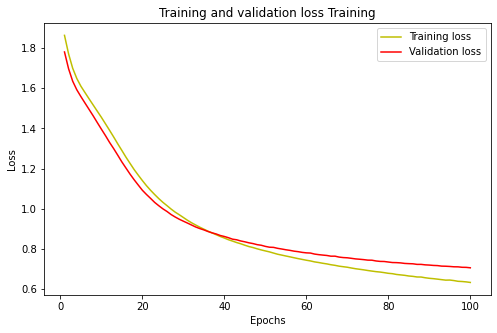

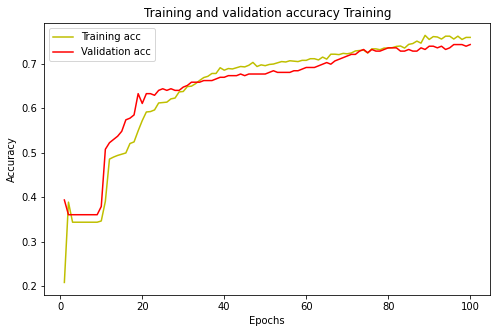

TrainingAccuracy Train: 75.87 %, Accuracy Test: 74.26 %


In [ ]:
from numpy.random import seed  # para garantir a reprodutibilidade dos resultados
seed(1984)
tf.random.set_seed(1984)

# camada de entrada 
model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])]) 

# entre aqui com uma camada oculta de 16 neurônios e função de ativação sigmoid
model.add(layers.Dense(16, activation='sigmoid'))

# entre aqui com a camada de saída
model.add(layers.Dense(7, activation='sigmoid'))

# entre aqui com a compilação do modelo com as métricas e métodos empregadas em teoria 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# entre aqui com o treinamento do modelo com 0.2 dos dados para validação e 100 iterações de treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

# plot
loss, val_loss, acc, val_acc = plot_loss_acc(history,'Training')
